# Google Playstore Case Study

## Exploring Google Play Store Ratings: Data Analysis Project

### Overview

Welcome to the Google Play Store Ratings Data Analysis project! In this endeavor, we will delve into the Google Play Store Ratings Dataset, employing essential data wrangling techniques and revisiting data visualization principles using Matplotlib. The journey also includes an introduction to the Seaborn library for advanced plotting methods and a brief exploration of 'Plotly' for interactive chart creation.

### Project Goals

The primary goal of this project is to independently analyze the Google Play Store Ratings Dataset. Key objectives include:

- Applying fundamental data wrangling techniques.
- Revisiting data visualization concepts with Matplotlib.
- Exploring Seaborn for more sophisticated plotting.
- Brief exposure to 'Plotly' for interactive charts.

### Problem Statement

The project revolves around addressing a real-world challenge faced by the Google Play Store team: developing a feature to enhance visibility for the most promising apps. We will seek insights into questions such as:

- The impact of app size or price on performance.
- Whether the number of installs reliably predicts app ratings.

### Project Scope

This project offers an opportunity to sharpen data analysis skills while addressing a practical problem in the context of the Google Play Store. Let's dive into the dataset and uncover valuable insights to inform strategies for improving app visibility.



###  Introduction to Data Visualisation

In [ ]:
# Install necessary libraries
# Use pip or conda based on your Python environment

# Data manipulation and analysis
!pip install pandas

# Data visualization
!pip install matplotlib seaborn plotly

# Jupyter Widgets for interactive features in Plotly (if using Jupyter Notebook)
!pip install ipywidgets

# Optional: Jupyter Lab extensions for Plotly (if using Jupyter Lab)
!pip install jupyterlab "plotly>=5.0.0"


In [184]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For advanced data visualization
import plotly.express as px  # For interactive plotting
import numpy as np

# Jupyter Widgets for interactive features in Plotly (if using Jupyter Notebook)
import ipywidgets as widgets

# Optional: Jupyter Lab extensions for Plotly (if using Jupyter Lab)
#import jupyterlab
#from jupyterlab.plotly import PlotlyPlot

# Set up matplotlib to work with Jupyter Notebooks
%matplotlib inline


In [108]:
# Read the dataset from the CSV file into a Pandas DataFrame
inp0 = pd.read_csv("googleplaystore_v2.csv")

# Display the first five rows of the DataFrame to check the data
inp0.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [109]:
# Check the shape of the DataFrame (number of rows and columns)
shape_of_df = inp0.shape
print(shape_of_df)


(10841, 13)


### Data Handling and Cleaning

### Data Preprocessing Steps

In the initial steps of the analysis, it is crucial to address missing values and incorrect data types to ensure the integrity of our dataset. The following approaches are employed to handle these issues:

#### Missing Values:

##### 1. Dropping Rows:
   - Remove rows containing missing values.

##### 2. Imputing Values:
   - Fill in missing values using appropriate techniques.

##### 3. Retaining Missing Values:
   - Keep the missing values if they do not impact the analysis significantly.

#### Incorrect Data Types:

##### 1. Cleaning Specific Values:
   - Identify and rectify specific values causing data type issues.

##### 2. Cleaning and Converting Columns:
   - Clean and convert entire columns to ensure consistent data types.

These preprocessing steps lay the foundation for a reliable and accurate analysis of the dataset.


In [110]:
# Display information about the DataFrame, including data types of all columns
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [111]:
# Check the number of null values in each column of the DataFrame
null_values_count = inp0.isnull().sum()
print(null_values_count)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### Handling Missing Values for Rating

- Since "Rating" is the target variable,
- To address missing values, we choose to drop the records.


In [112]:
# Drop rows with null values in the "Rating" field and create a new DataFrame inp1
inp1 = inp0[~inp0.Rating.isnull()]

# Check the shape of the updated DataFrame inp1
shape_of_df_after_dropping_nulls = inp1.shape
print(shape_of_df_after_dropping_nulls)


(9367, 13)


In [113]:
# Check the number of null values in the "Rating" field after dropping rows
null_values_in_rating_after_drop = inp1.Rating.isnull().sum()
print(null_values_in_rating_after_drop)


0


In [114]:
# Check the number of null values in the entire DataFrame inp1
# Also, find the total number of null values across all columns
total_null_values_in_df = inp1.isnull().sum().sum()
print(total_null_values_in_df)
inp1.isnull().sum()

8


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [115]:
# Inspect the rows where the 'Android Ver' column has null values
inp1[inp1['Android Ver'].isnull()]


App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [116]:
# Identify and display the row with shifted values in the 'Android Ver' column
row_with_shifted_values = inp1.loc[10472, :]
print(row_with_shifted_values)

# Drop the row with shifted values based on conditions in 'Android Ver' and 'Category' columns
inp1 = inp1[~((inp1['Android Ver'].isnull()) & (inp1['Category'] == "1.9"))]

# Check null values again in the 'Android Ver' column to cross-verify
inp1[inp1['Android Ver'].isnull()]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [117]:
# Check the count of each unique value in the 'Android Ver' column to find the most common value
android_ver_most_common_value = inp1['Android Ver'].value_counts().idxmax()
print(android_ver_most_common_value)

print("-----------------------------------------------------------")
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

4.1 and up
-----------------------------------------------------------


Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [118]:
# Fill null values in the 'Android Ver' column with the most common value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])


In [119]:
# Check the number of null values in the 'Android Ver' column after filling with the most common value
android_ver_nulls_after_fill = inp1['Android Ver'].isnull().sum()
print(android_ver_nulls_after_fill)


0


In [120]:
# Check the number of null values in the entire DataFrame inp1
total_nulls_after_operations = inp1.isnull().sum()
print(total_nulls_after_operations)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64


In [121]:
# Check the count of each unique value in the 'Current Ver' column to find the most common value
inp1['Current Ver'].value_counts()


Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [122]:
# Replace null values in the 'Current Ver' column with the most common value
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


In [123]:
#Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [124]:
#Check the datatypes of all the columns 
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [125]:
#calculating the average price of all apps having the Android version as "4.1 and up" 
inp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [126]:
#Analyse the Price column to check the issue
inp1.Price.value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [127]:
# Write a function to convert 'Price' values to numeric format
inp1.Price = inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

In [128]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [129]:
#Analyse the Reviews column
inp1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [130]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32")
#Check the quantitative spread of this dataframe
inp1.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [131]:
#Analyse the Installs Column
inp1.Installs.head()


0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [132]:
# Define a function to clean 'Installs' values
def clean_installs(val):
    return int(val.replace(",", "").replace("+", ""))

# Apply the cleaning function to the 'Installs' column
inp1['Installs'] = inp1['Installs'].apply(clean_installs)

# Display descriptive statistics for the 'Installs' column
installs_description = inp1['Installs'].describe()
print(installs_description)


count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


#### Sanity Checks



To ensure the accuracy and reliability of our data, it's essential to perform sanity checks that validate its factual correctness. Here are some key sanity checks:

1. **Rating Range:**
   - Confirm that the ratings fall within the expected range of 1 to 5 for all applications.

2. **Reviews vs. Installs:**
   - Verify that the number of reviews is less than or equal to the number of installs for each app.

3. **Pricing Integrity for Free Apps:**
   - Ensure that free apps have a price listed as 0; there shouldn't be any non-zero prices for free applications.



In [133]:
#Perform the sanity checks on the Reviews column
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [134]:
inp1[(inp1.Reviews > inp1.Installs)]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [135]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [136]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Type == "Free") & (inp1.Price>0)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

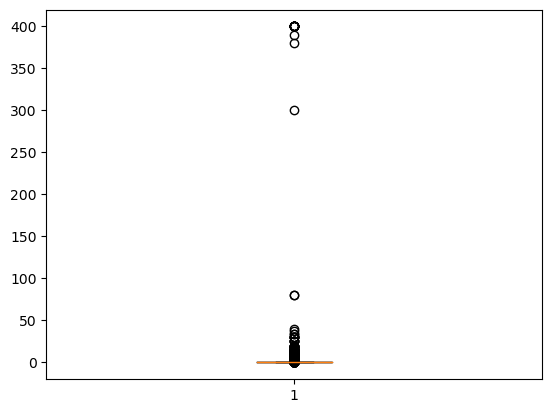

In [137]:
# Create a box plot for the 'Price' column
plt.boxplot(inp1['Price'])

# Display the box plot
plt.show()


In [138]:
#Check the apps with price more than 200
inp1[inp1.Price > 200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

In [139]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]

In [140]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

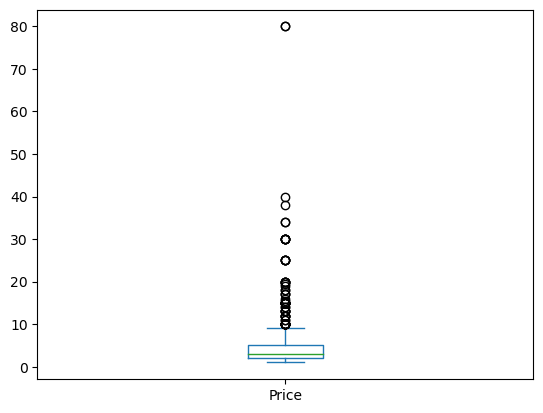

In [141]:
# Create a box plot for the 'Price' column, focusing on paid apps
inp1[inp1.Price > 0].Price.plot.box()

# Display the box plot
plt.show()


In [142]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

In [143]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

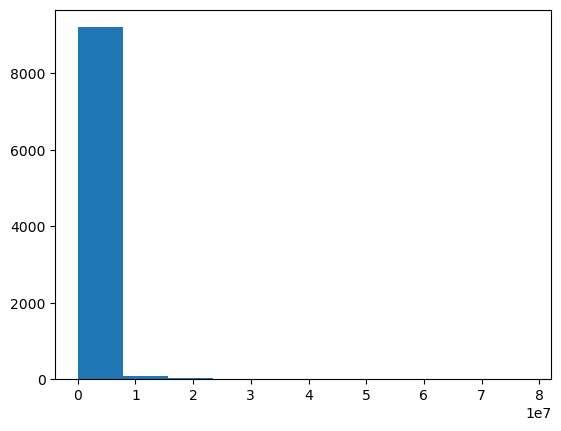

In [144]:
# Create a histogram for the 'Reviews' column
plt.hist(inp1['Reviews'])

# Display the histogram
plt.show()


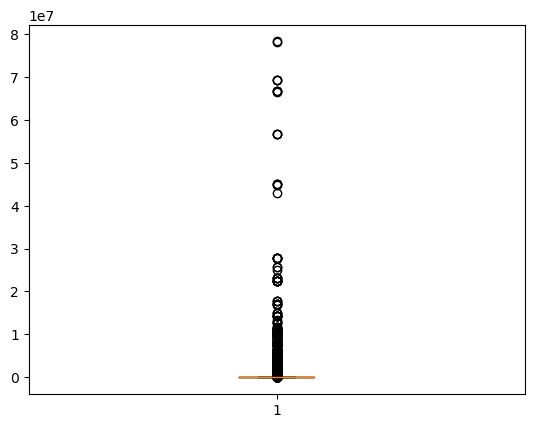

In [145]:
# Create a box plot for the 'Reviews' column
plt.boxplot(inp1['Reviews'])

# Display the box plot
plt.show()


In [59]:
#Check records with 1 million reviews
inp1[inp1.Reviews >= 10000000]

App       Category  \
335            Messenger – Text and Video Chat for Free  COMMUNICATION   
336                                  WhatsApp Messenger  COMMUNICATION   
342                                     Viber Messenger  COMMUNICATION   
378         UC Browser - Fast Download Private & Secure  COMMUNICATION   
381                                  WhatsApp Messenger  COMMUNICATION   
...                                                 ...            ...   
6449                        BBM - Free Calls & Messages  COMMUNICATION   
7536  Security Master - Antivirus, VPN, AppLock, Boo...          TOOLS   
7937                                     Shadow Fight 2           GAME   
8894  Cache Cleaner-DU Speed Booster (booster & clea...          TOOLS   
8896  DU Battery Saver - Battery Charger & Battery Life          TOOLS   

      Rating   Reviews          Size    Installs  Type  Price Content Rating  \
335      4.0  56642847  21516.529524  1000000000  Free    0.0       Everyone   
336      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
342      4.3  11334799  21516.529524   500000000  Free    0.0       Everyone   
378      4.5  17712922  40000.000000   500000000  Free    0.0           Teen   
381      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
...      ...       ...           ...         ...   ...    ...            ...   
6449     4.3  12843436  21516.529524   100000000  Free    0.0       Everyone   
7536     4.7  24900999  21516.529524   500000000  Free    0.0       Everyone   
7937     4.6  10981850  88000.000000   100000000  Free    0.0   Everyone 10+   
8894     4.5  12759815  15000.000000   100000000  Free    0.0       Everyone   
8896     4.5  13479633  14000.000000   100000000  Free    0.0       Everyone   

             Genres    Last Updated         Current Ver         Android Ver  
335   Communication  August 1, 2018  Varies with device  Varies with device  
336   Communication  August 3, 2018  Varies with device  Varies with device  
342   Communication   July 18, 2018  Varies with device  Varies with device  
378   Communication  August 2, 2018         12.8.5.1121          4.0 and up  
381   Communication  August 3, 2018  Varies with device  Varies with device  
...             ...             ...                 ...                 ...  
6449  Communication  August 2, 2018  Varies with device        4.0.3 and up  
7536          Tools  August 4, 2018               4.6.6  Varies with device  
7937         Action    July 2, 2018              1.9.38          3.0 and up  
8894          Tools   July 25, 2018               3.1.2          4.0 and up  
8896          Tools    June 5, 2018             4.8.7.8          4.0 and up  

[92 rows x 13 columns]

In [60]:
#Drop the above records
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

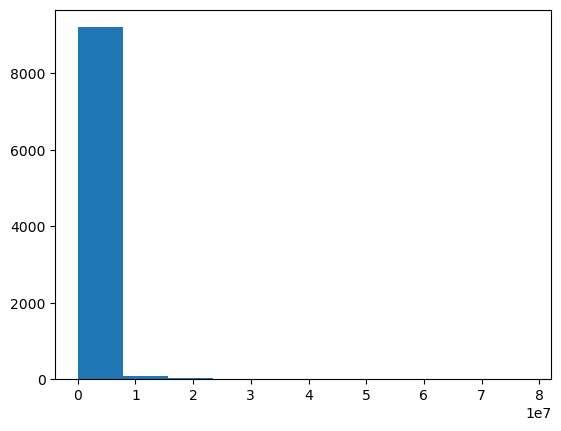

In [146]:
# Create a histogram for the 'Reviews' column again to observe peaks
plt.hist(inp1['Reviews'])

# Display the histogram
plt.show()


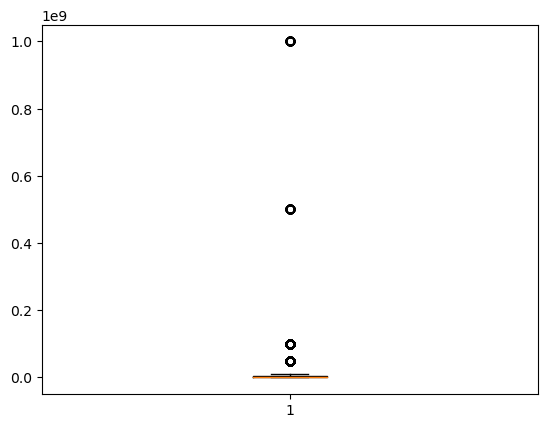

In [147]:
# Create a box plot for the 'Installs' column
plt.boxplot(inp1['Installs'])

# Display the box plot
plt.show()


In [148]:
# Calculate and report the Interquartile Range (IQR) for the 'Installs' column
iqr_installs = inp1['Installs'].quantile(0.75) - inp1['Installs'].quantile(0.25)
print("Interquartile Range (IQR) for Installs:", iqr_installs)


Interquartile Range (IQR) for Installs: 4990000.0


In [64]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [65]:
#CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(8624, 13)

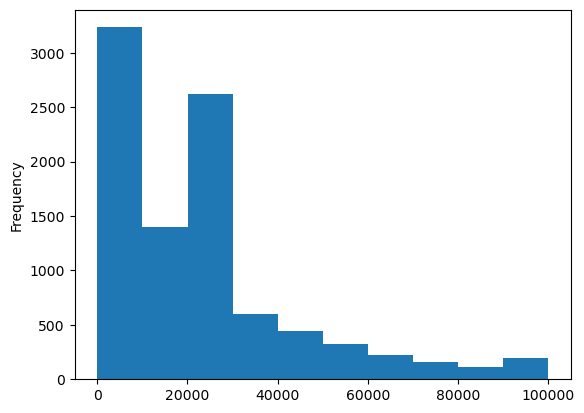

In [149]:
# Plot a histogram for the 'Size' column
inp1['Size'].plot.hist()

# Display the histogram
plt.show()


In [67]:
inp1.Size.describe()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

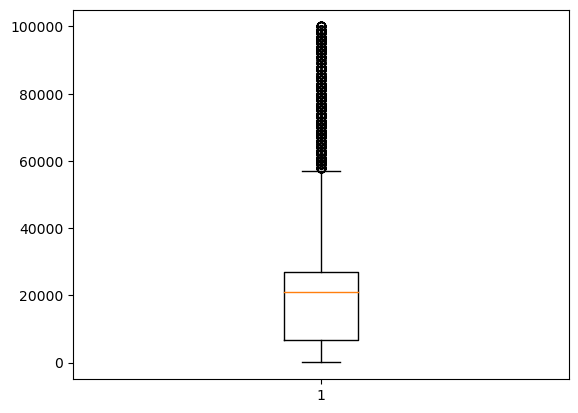

In [150]:
# Create a box plot for the 'Size' column
plt.boxplot(inp1['Size'])

# Display the box plot
plt.show()


In [151]:
# Report back the median value for the 'Size' column
median_size = inp1['Size'].median()
print("Median Size:", median_size)


Median Size: 21000.0


### Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\3319584648.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'])


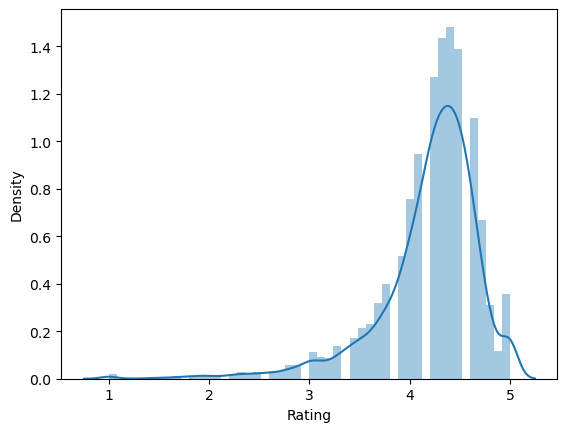

In [152]:
# Create a distribution plot for the 'Rating' column using Seaborn
sns.distplot(inp1['Rating'])

# Display the distribution plot
plt.show()


C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\2830061833.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


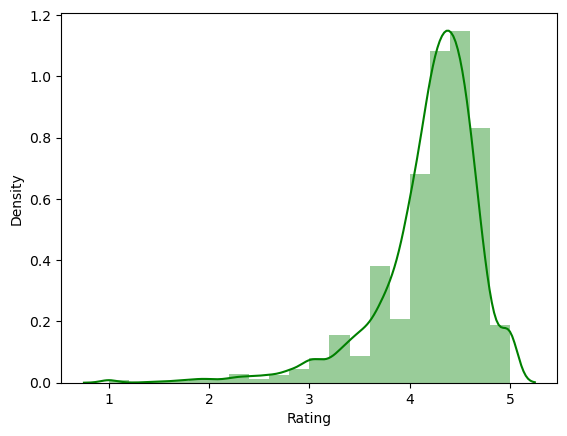

In [157]:
# Create a distribution plot for the 'Rating' column with a specified number of bins
sns.distplot(inp1['Rating'], bins=20, color="g")

# Display the distribution plot
plt.show()


C:\Users\IPSITA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


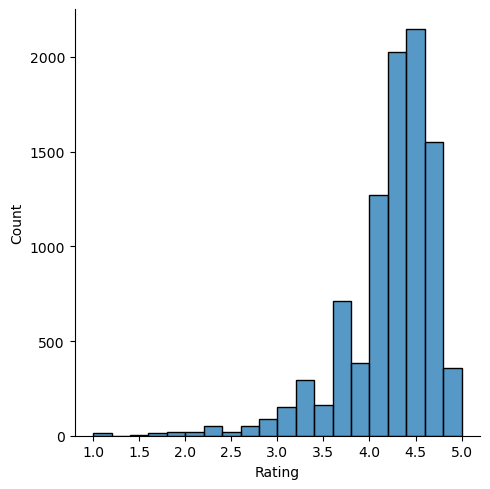

In [156]:
# Create a distribution plot for the 'Rating' column with a specified number of bins
sns.displot(inp1['Rating'], bins=20)

# Display the distribution plot
plt.show()


C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\2539763608.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


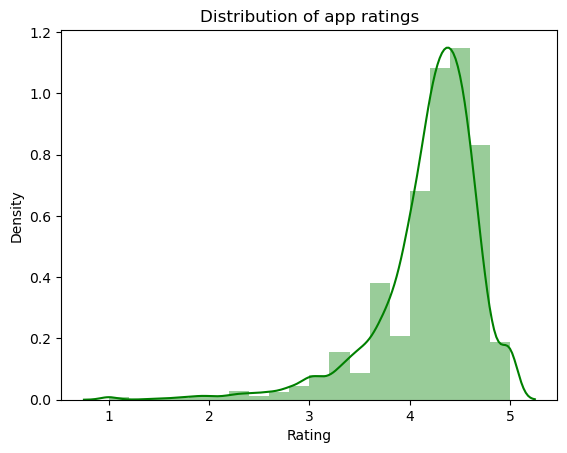

In [158]:
# Create a distribution plot for the 'Rating' column with specified bins and color using Seaborn
sns.distplot(inp1['Rating'], bins=20, color="g")

# Add a title to the plot using Matplotlib
plt.title("Distribution of app ratings", fontsize=12)

# Display the distribution plot
plt.show()


#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\2947690702.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


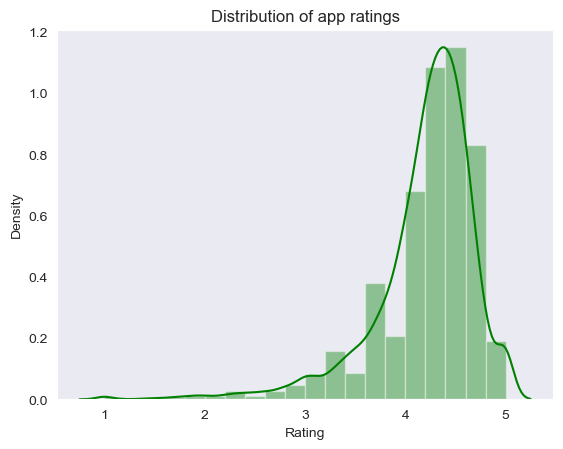

In [159]:
# Set Seaborn style to "dark"
sns.set_style("dark")

# Create a distribution plot for the 'Rating' column with specified bins and color using Seaborn
sns.distplot(inp1['Rating'], bins=20, color="g")

# Add a title to the plot using Matplotlib
plt.title("Distribution of app ratings", fontsize=12)

# Display the distribution plot
plt.show()


C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\4255919643.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


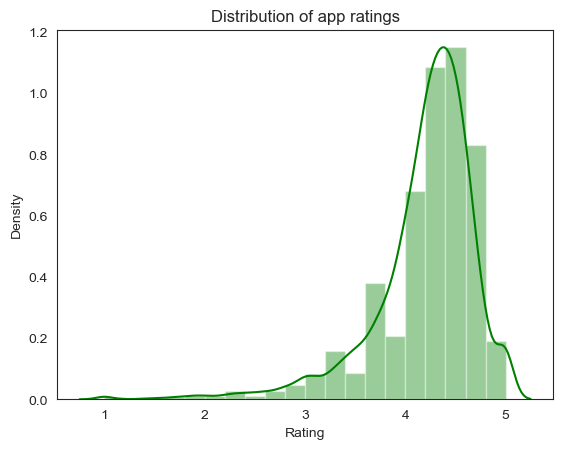

In [160]:
# Set Seaborn style to "white"
sns.set_style("white")

# Create a distribution plot for the 'Rating' column with specified bins and color using Seaborn
sns.distplot(inp1['Rating'], bins=20, color="g")

# Add a title to the plot using Matplotlib
plt.title("Distribution of app ratings", fontsize=12)

# Display the distribution plot
plt.show()


C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\1426030074.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


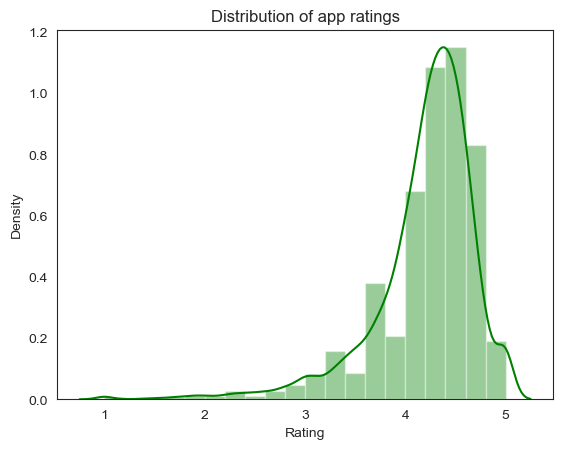

In [161]:
# Set Matplotlib style to "tableau-colorblind10"
plt.style.use("tableau-colorblind10")

# Create a distribution plot for the 'Rating' column with specified bins and color using Seaborn
sns.distplot(inp1['Rating'], bins=20, color="g")

# Add a title to the plot using Matplotlib
plt.title("Distribution of app ratings", fontsize=12)

# Display the distribution plot
plt.show()


C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\963535983.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


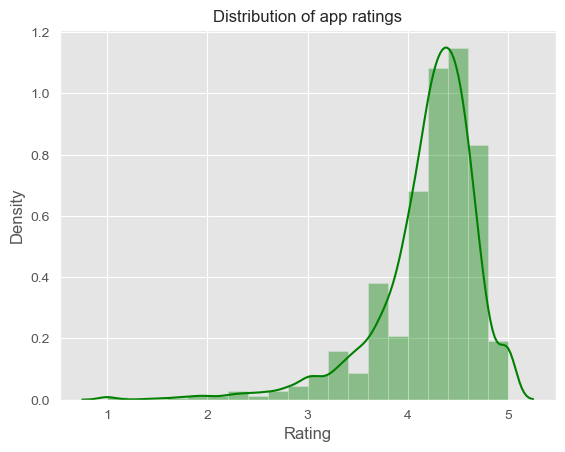

In [162]:
# Set Matplotlib style to "ggplot"
plt.style.use("ggplot")

# Create a distribution plot for the 'Rating' column with specified bins and color using Seaborn
sns.distplot(inp1['Rating'], bins=20, color="g")

# Add a title to the plot using Matplotlib
plt.title("Distribution of app ratings", fontsize=12)

# Display the distribution plot
plt.show()


C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\2832012015.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


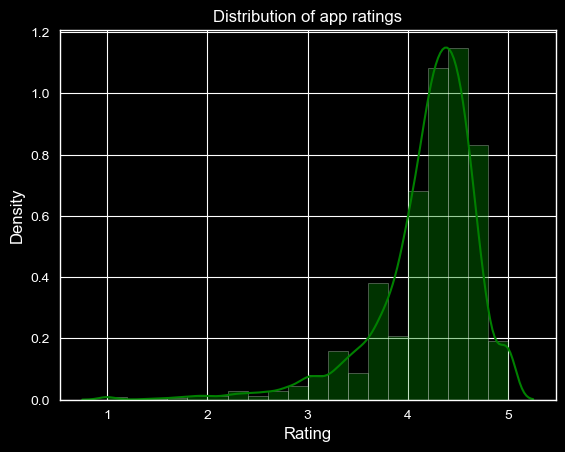

In [163]:
# Set Matplotlib style to "dark_background"
plt.style.use("dark_background")

# Create a distribution plot for the 'Rating' column with specified bins and color using Seaborn
sns.distplot(inp1['Rating'], bins=20, color="g")

# Add a title to the plot using Matplotlib
plt.title("Distribution of app ratings", fontsize=12)

# Display the distribution plot
plt.show()


C:\Users\IPSITA\AppData\Local\Temp\ipykernel_11520\2417405079.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inp1['Rating'], bins=20, color="g")


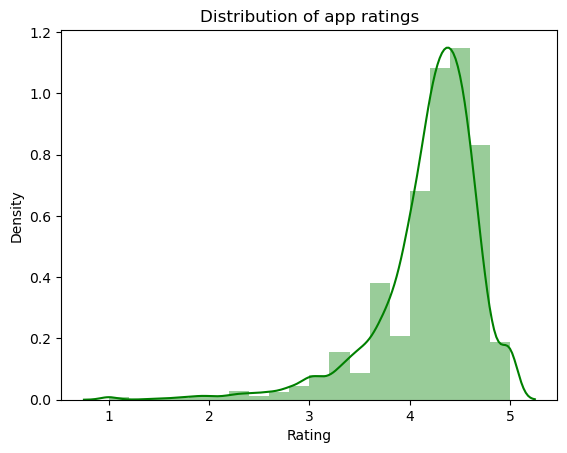

In [164]:
# Set Matplotlib style back to the default style
plt.style.use("default")

# Create a distribution plot for the 'Rating' column with specified bins and color using Seaborn
sns.distplot(inp1['Rating'], bins=20, color="g")

# Add a title to the plot using Matplotlib
plt.title("Distribution of app ratings", fontsize=12)

# Display the distribution plot
plt.show()


#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

In [165]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Content Rating
Everyone           7394
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [166]:
#Remove the rows with values which are less represented 
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [167]:
inp1.shape

(9334, 13)

In [168]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)

In [169]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9334 non-null   object 
 1   Category        9334 non-null   object 
 2   Rating          9334 non-null   float64
 3   Reviews         9334 non-null   int32  
 4   Size            9334 non-null   float64
 5   Installs        9334 non-null   int64  
 6   Type            9334 non-null   object 
 7   Price           9334 non-null   float64
 8   Content Rating  9334 non-null   object 
 9   Genres          9334 non-null   object 
 10  Last Updated    9334 non-null   object 
 11  Current Ver     9334 non-null   object 
 12  Android Ver     9334 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 911.7+ KB


In [170]:
#Check the apps belonging to different categories of Content Rating 
inp1['Content Rating'].value_counts()

Content Rating
Everyone        7394
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: count, dtype: int64

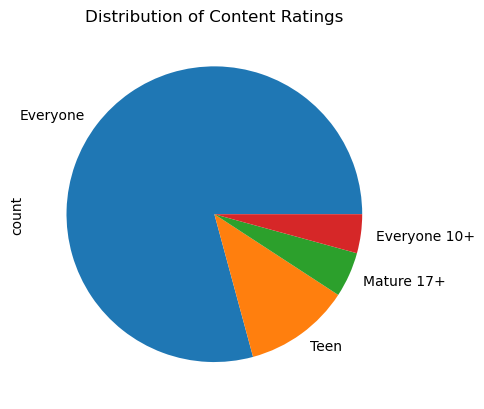

In [171]:
# Plot a pie chart for the 'Content Rating' column
inp1['Content Rating'].value_counts().plot.pie()

# Add a title to the pie chart
plt.title("Distribution of Content Ratings", fontsize=12)

# Display the pie chart
plt.show()


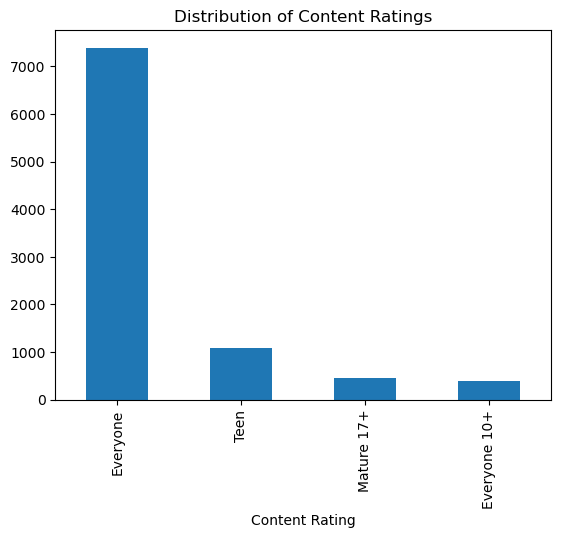

In [172]:
# Plot a bar chart for the 'Content Rating' column
inp1['Content Rating'].value_counts().plot.bar()

# Add a title to the bar chart
plt.title("Distribution of Content Ratings", fontsize=12)

# Display the bar chart
plt.show()


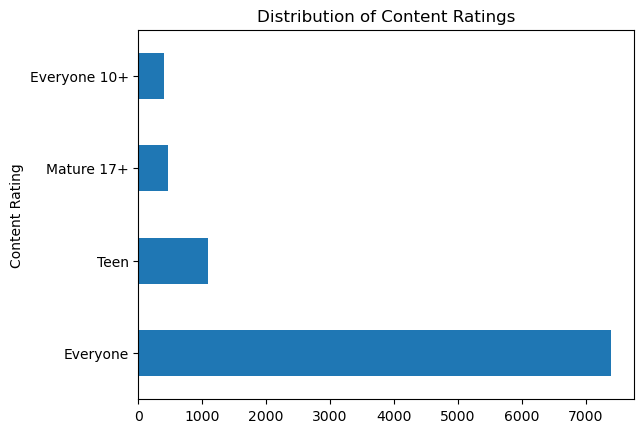

In [173]:
# Plot a horizontal bar chart for the 'Content Rating' column
inp1['Content Rating'].value_counts().plot.barh()

# Add a title to the horizontal bar chart
plt.title("Distribution of Content Ratings", fontsize=12)

# Display the horizontal bar chart
plt.show()


#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

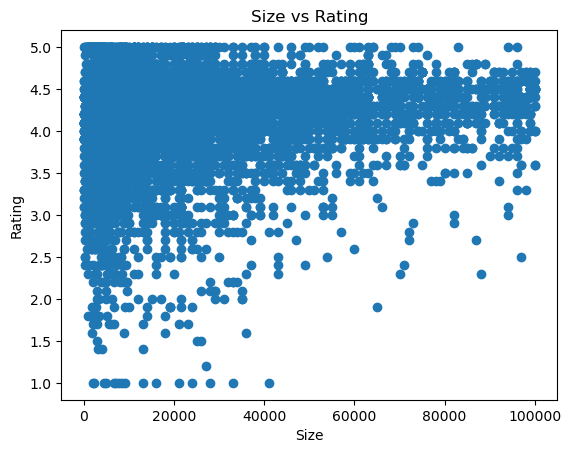

In [174]:
# Plot a scatter plot between 'Size' and 'Rating' using Matplotlib
plt.scatter(inp1['Size'], inp1['Rating'])

# Add labels to the axes
plt.xlabel('Size')
plt.ylabel('Rating')

# Add a title to the scatter plot
plt.title('Size vs Rating')

# Display the scatter plot
plt.show()


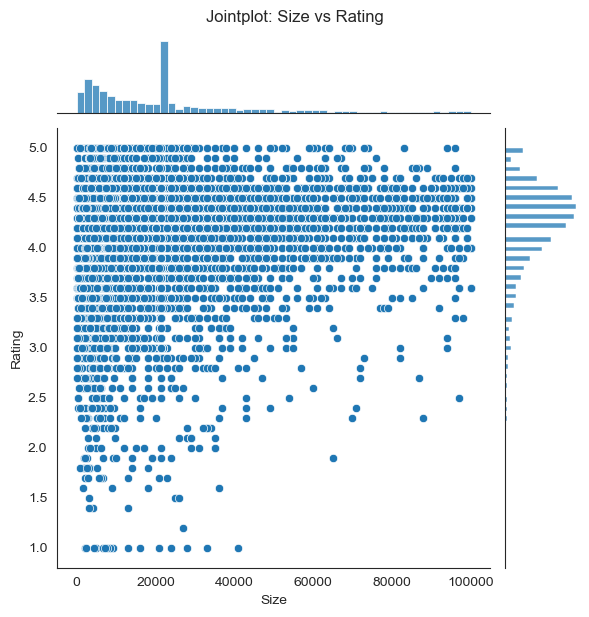

In [175]:
# Set Seaborn style to "white"
sns.set_style("white")

# Create a jointplot for 'Size' vs 'Rating' using Seaborn
sns.jointplot(x='Size', y='Rating', data=inp1, kind='scatter')

# Add a title to the jointplot
plt.suptitle("Jointplot: Size vs Rating", y=1.02, fontsize=12)

# Display the jointplot
plt.show()


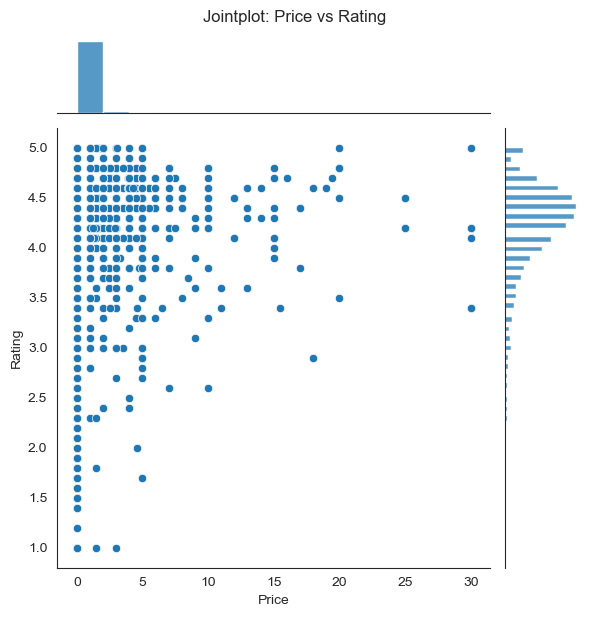

In [176]:
# Create a jointplot for 'Price' vs 'Rating' using Seaborn
sns.jointplot(x=inp1['Price'], y=inp1['Rating'], kind='scatter')

# Add a title to the jointplot
plt.suptitle("Jointplot: Price vs Rating", y=1.02, fontsize=12)

# Display the jointplot
plt.show()


**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

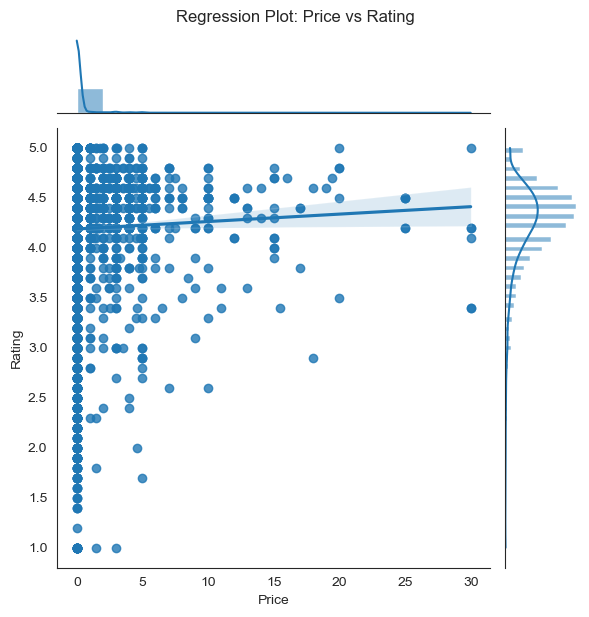

In [177]:
# Create a jointplot with a regression line for 'Price' vs 'Rating' using Seaborn
sns.jointplot(x=inp1['Price'], y=inp1['Rating'], kind='reg')

# Add a title to the jointplot
plt.suptitle("Regression Plot: Price vs Rating", y=1.02, fontsize=12)

# Display the jointplot
plt.show()


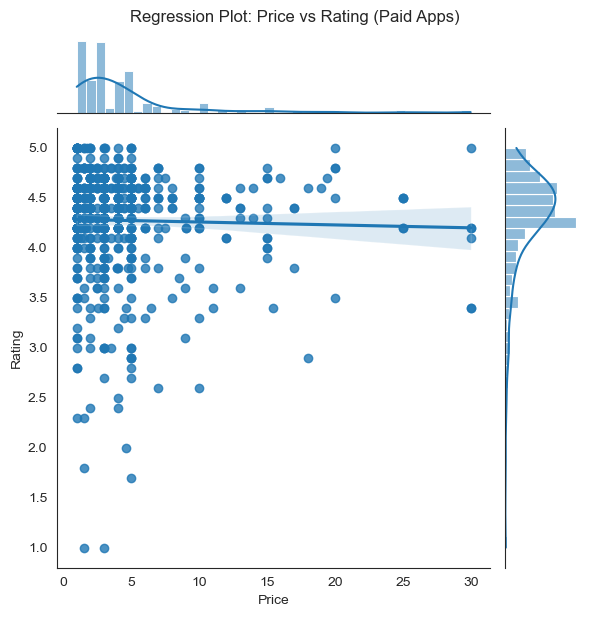

In [178]:
# Create a jointplot with a regression line for 'Price' vs 'Rating' for only paid apps using Seaborn
sns.jointplot(x="Price", y="Rating", data=inp1[inp1.Price > 0], kind="reg")

# Add a title to the jointplot
plt.suptitle("Regression Plot: Price vs Rating (Paid Apps)", y=1.02, fontsize=12)

# Display the jointplot
plt.show()


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

C:\Users\IPSITA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


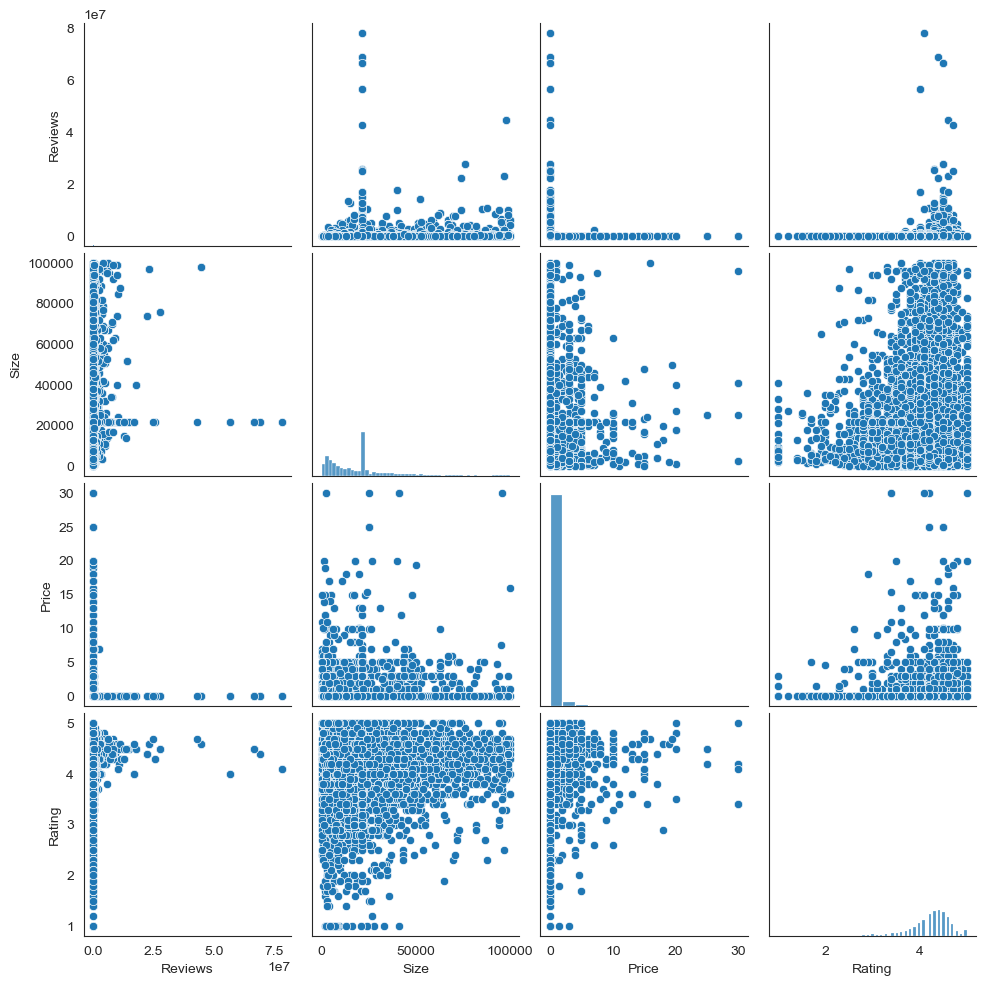

In [179]:
# Create a pair plot for 'Reviews', 'Size', 'Price', and 'Rating' using Seaborn
sns.pairplot(inp1[['Reviews', 'Size', 'Price', 'Rating']])

# Display the pair plot
plt.show()


**Bar Charts**

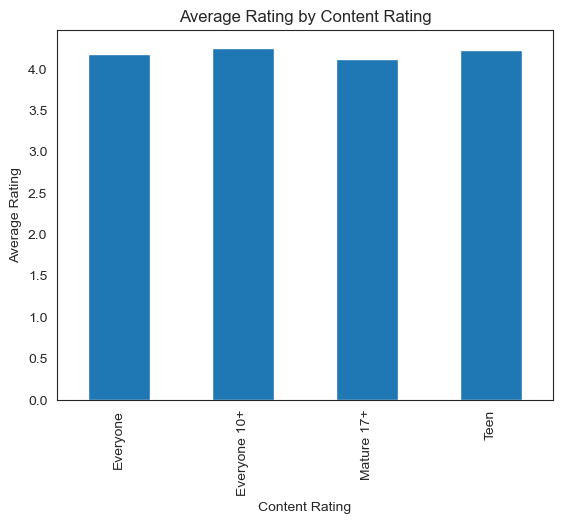

In [180]:
# Group by 'Content Rating' and calculate the mean of 'Rating', then plot a bar chart
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

# Add labels to the axes
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')

# Add a title to the bar chart
plt.title('Average Rating by Content Rating')

# Display the bar chart
plt.show()


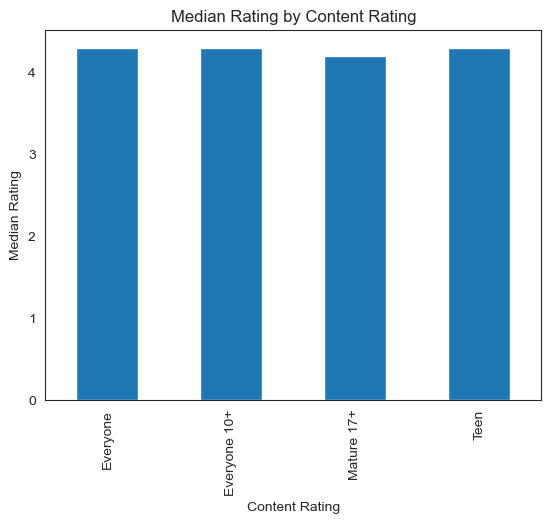

In [181]:
# Group by 'Content Rating' and calculate the median of 'Rating', then plot a bar chart
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

# Add labels to the axes
plt.xlabel('Content Rating')
plt.ylabel('Median Rating')

# Add a title to the bar chart
plt.title('Median Rating by Content Rating')

# Display the bar chart
plt.show()


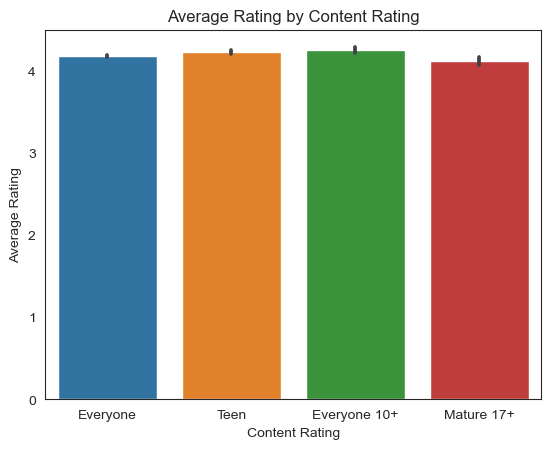

In [182]:
# Use Seaborn's barplot to plot 'Content Rating' vs 'Rating'
sns.barplot(data=inp1, x="Content Rating", y="Rating")

# Add labels to the axes
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')  # Assuming 'Rating' represents average rating in this context

# Add a title to the bar chart
plt.title('Average Rating by Content Rating')

# Display the bar chart
plt.show()


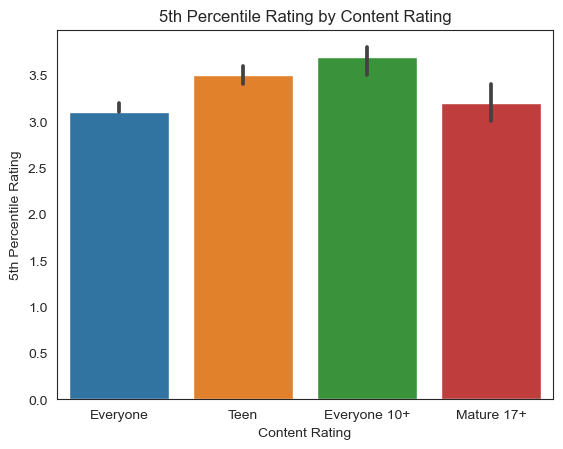

In [185]:
# Use Seaborn's barplot to plot 'Content Rating' vs the 5th percentile of 'Rating'
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x, 0.05))

# Add labels to the axes
plt.xlabel('Content Rating')
plt.ylabel('5th Percentile Rating')

# Add a title to the bar chart
plt.title('5th Percentile Rating by Content Rating')

# Display the bar chart
plt.show()


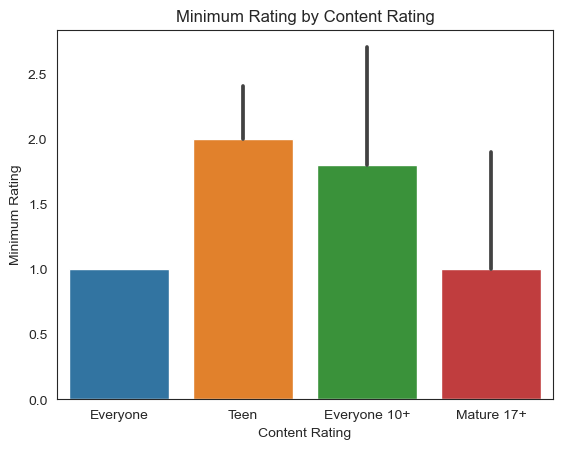

In [186]:
# Use Seaborn's barplot to plot 'Content Rating' vs the minimum 'Rating'
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.min)

# Add labels to the axes
plt.xlabel('Content Rating')
plt.ylabel('Minimum Rating')

# Add a title to the bar chart
plt.title('Minimum Rating by Content Rating')

# Display the bar chart
plt.show()


__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories



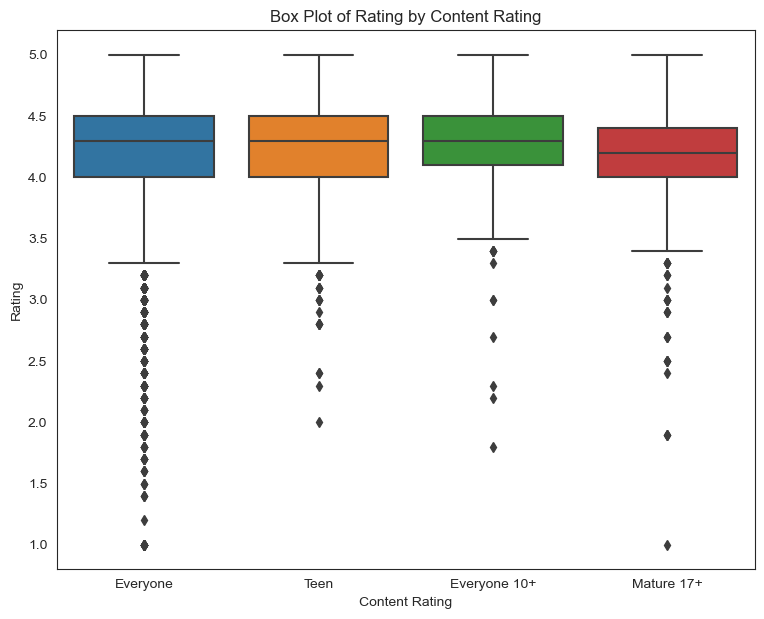

In [188]:
# Set the figure size for better visualization
plt.figure(figsize=[9,7])

# Use Seaborn's boxplot to plot 'Content Rating' vs 'Rating'
sns.boxplot(data=inp1, x='Content Rating', y='Rating')

# Add labels to the axes
plt.xlabel('Content Rating')
plt.ylabel('Rating')

# Add a title to the box plot
plt.title('Box Plot of Rating by Content Rating')

# Display the box plot
plt.show()



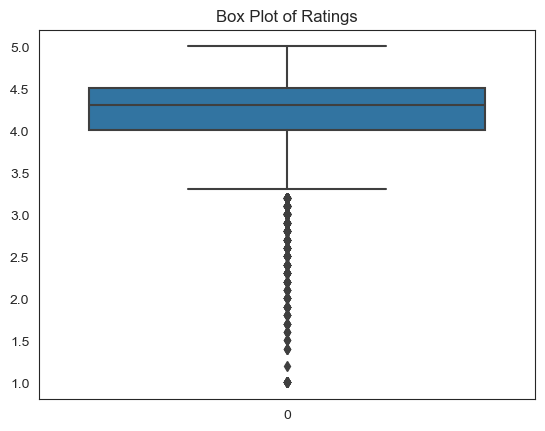

In [189]:
# Use Seaborn's boxplot to plot the 'Rating' column
sns.boxplot(inp1.Rating)

# Add a title to the box plot
plt.title('Box Plot of Ratings')

# Display the box plot
plt.show()


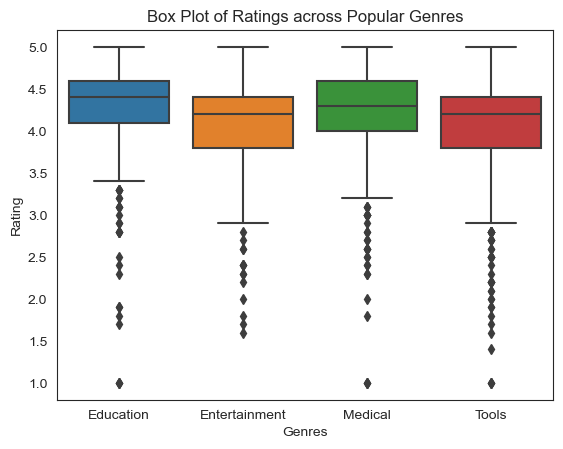

In [191]:
# Extract the 4 most popular genres
c = ['Tools', 'Entertainment', 'Medical', 'Education']
inp5 = inp1[inp1['Genres'].isin(c)]

# Use Seaborn's boxplot to plot Ratings across the 4 most popular genres
sns.boxplot(data=inp5, x='Genres', y='Rating')

# Add labels to the axes
plt.xlabel('Genres')
plt.ylabel('Rating')

# Add a title to the box plot
plt.title('Box Plot of Ratings across Popular Genres')

# Display the box plot
plt.show()


#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

In [ ]:
##Ratings vs Size vs Content Rating

In [192]:
# Create buckets for the 'Size' column using pd.qcut
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL", "L", "M", "H", "VH"])


In [193]:
# Create a pivot table for 'Size_Bucket' and 'Content Rating' with values set to 'Rating'
pivot_table_size_content = pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating")

# Display the pivot table
pivot_table_size_content


Size_Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.114026  4.167953  4.254010  4.163872  4.222132
Everyone 10+    4.189474  4.251282  4.253153  4.226761  4.283439
Mature 17+      4.112281  4.057292  4.098592  4.174603  4.194175
Teen            4.199074  4.221893  4.207101  4.228462  4.276855

In [194]:
# Create a pivot table for 'Size_Bucket' and 'Content Rating' with values set to 20th percentile of 'Rating'
pivot_table_size_content_20th = pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=lambda x: np.quantile(x, 0.2))

# Display the pivot table
pivot_table_size_content_20th


Size_Bucket       VL     L    M     H    VH
Content Rating                             
Everyone        3.80  3.80  4.1  3.82  4.00
Everyone 10+    3.86  4.06  4.1  4.00  4.02
Mature 17+      3.42  3.60  4.0  3.90  4.00
Teen            3.80  3.90  4.0  4.00  4.00

In [195]:
# Create a pivot table for 'Size_Bucket' and 'Content Rating' with values set to 20th percentile of 'Rating'
res = pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=lambda x: np.quantile(x, 0.2))

# Display the pivot table
res


Size_Bucket       VL     L    M     H    VH
Content Rating                             
Everyone        3.80  3.80  4.1  3.82  4.00
Everyone 10+    3.86  4.06  4.1  4.00  4.02
Mature 17+      3.42  3.60  4.0  3.90  4.00
Teen            3.80  3.90  4.0  4.00  4.00

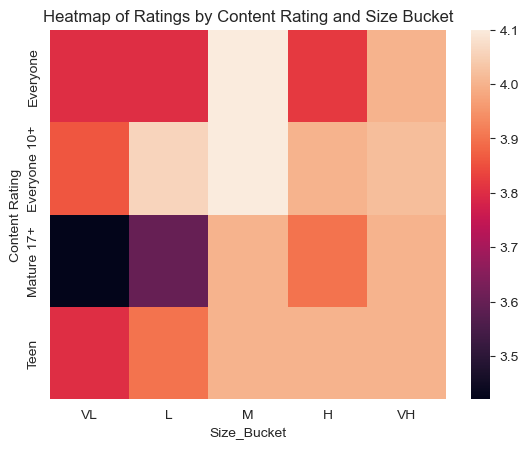

In [196]:
# Plot a heatmap using Seaborn's heatmap function
sns.heatmap(res)

# Add a title to the heatmap
plt.title('Heatmap of Ratings by Content Rating and Size Bucket')

# Display the heatmap
plt.show()


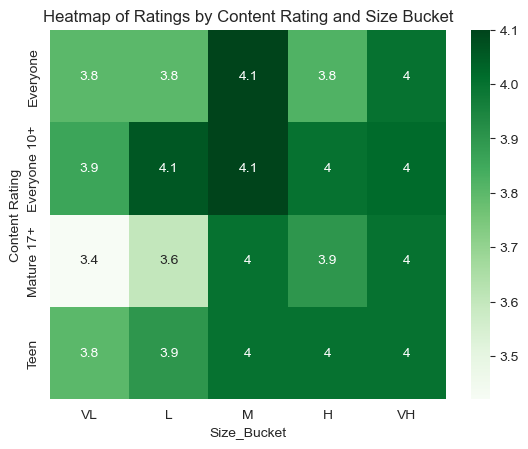

In [197]:
# Plot a heatmap with customizations using Seaborn's heatmap function
sns.heatmap(res, cmap="Greens", annot=True)

# Add a title to the heatmap
plt.title('Heatmap of Ratings by Content Rating and Size Bucket')

# Display the heatmap
plt.show()


### Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. 

In [200]:
## Extract the month from the Last Updated Date
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [201]:
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [202]:
## Find the average Rating across all the months
inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143735
2     4.094048
3     4.110989
4     4.154910
5     4.162410
6     4.184316
7     4.249841
8     4.292963
9     4.042636
10    4.019687
11    4.112338
12    4.071726
Name: Rating, dtype: float64

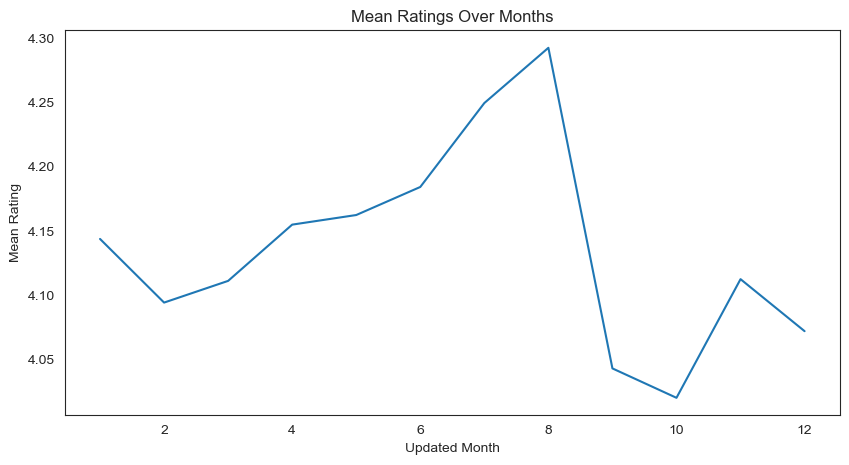

In [204]:
# Set the figure size for better visualization
plt.figure(figsize=[10, 5])

# Group by 'updated_month' and calculate the mean of 'Rating', then plot a line graph
inp1.groupby(['updated_month'])['Rating'].mean().plot()

# Add labels to the axes
plt.xlabel('Updated Month')
plt.ylabel('Mean Rating')

# Add a title to the line graph
plt.title('Mean Ratings Over Months')

# Display the line graph
plt.show()


#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [205]:
# Create a pivot table for 'Content Rating' and 'updated_month' with values set to 'Installs'
pivot_table_installs = pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

# Display the pivot table
pivot_table_installs


Content Rating     Everyone  Everyone 10+  Mature 17+         Teen
updated_month                                                     
1                1025387390     105282000     9701210     44159010
2                 945372005      19821000    13021500     39597710
3                1045365520      30322510     9111100     99850310
4                2593371180      23300000     5259000    271619410
5                5431067800     128173500   110140100    562689600
6                6157170505    1367727100   155257200    505716600
7               46991109680    9726556000  1739491910  15983556800
8               46490943320    1715821000  3462981700  16997855650
9                 410340410      24931100     2201010     22483100
10                508279680      23101000     3160000     55629210
11               1475424710      60310000     1070100     81261100
12               1077105770       8410000    12960100     51707100

In [206]:
# Create a pivot table for 'Content Rating' and 'updated_month' with values set to 'Installs'
monthly = pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

# Display the pivot table
monthly


Content Rating     Everyone  Everyone 10+  Mature 17+         Teen
updated_month                                                     
1                1025387390     105282000     9701210     44159010
2                 945372005      19821000    13021500     39597710
3                1045365520      30322510     9111100     99850310
4                2593371180      23300000     5259000    271619410
5                5431067800     128173500   110140100    562689600
6                6157170505    1367727100   155257200    505716600
7               46991109680    9726556000  1739491910  15983556800
8               46490943320    1715821000  3462981700  16997855650
9                 410340410      24931100     2201010     22483100
10                508279680      23101000     3160000     55629210
11               1475424710      60310000     1070100     81261100
12               1077105770       8410000    12960100     51707100

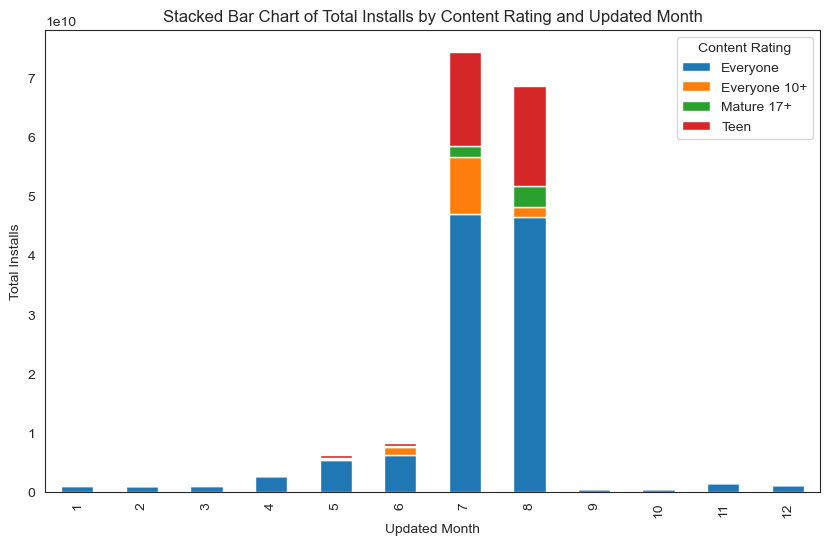

In [207]:
# Plot a stacked bar chart using the monthly pivot table
monthly.plot(kind="bar", stacked=True, figsize=[10, 6])

# Add labels to the axes
plt.xlabel('Updated Month')
plt.ylabel('Total Installs')

# Add a title to the stacked bar chart
plt.title('Stacked Bar Chart of Total Installs by Content Rating and Updated Month')

# Display the stacked bar chart
plt.show()


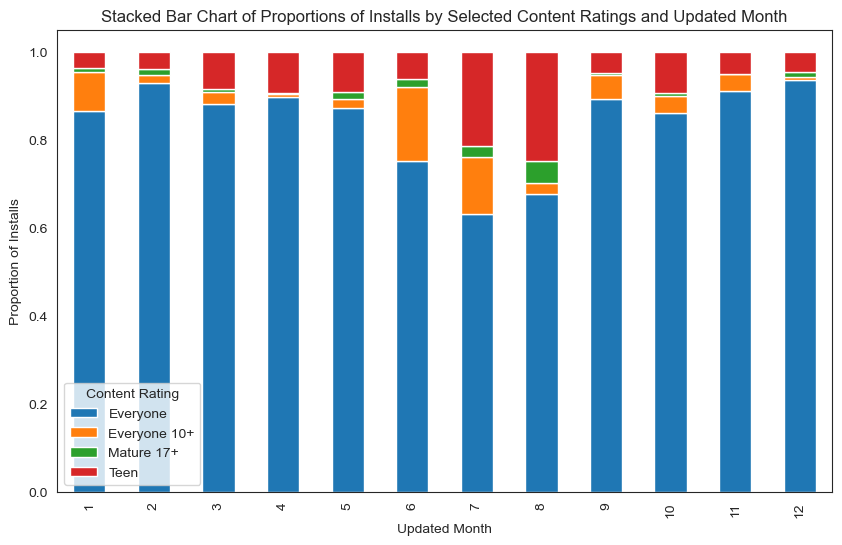

In [208]:
# Calculate proportions for selected Content Ratings
monthly_perc = monthly[["Everyone", "Everyone 10+", "Mature 17+", "Teen"]].apply(lambda x: x / x.sum(), axis=1)

# Plot a stacked bar chart with proportions
monthly_perc.plot(kind="bar", stacked=True, figsize=[10, 6])

# Add labels to the axes
plt.xlabel('Updated Month')
plt.ylabel('Proportion of Installs')

# Add a title to the stacked bar chart
plt.title('Stacked Bar Chart of Proportions of Installs by Selected Content Ratings and Updated Month')

# Display the stacked bar chart
plt.show()


#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

In [210]:
# Group by 'updated_month' and calculate the mean of 'Rating'
res = inp1.groupby(["updated_month"])[['Rating']].mean()

# Reset the index to make 'updated_month' a column
res.reset_index(inplace=True)

res

updated_month    Rating
0               1  4.143735
1               2  4.094048
2               3  4.110989
3               4  4.154910
4               5  4.162410
5               6  4.184316
6               7  4.249841
7               8  4.292963
8               9  4.042636
9              10  4.019687
10             11  4.112338
11             12  4.071726

In [211]:
# Prepare the plot using Plotly Express
fig = px.line(res, x="updated_month", y="Rating", title="Monthly Average Rating")

# Display the plot
fig.show()


**Summary of Case Study:**

In this case study, the initial focus was on data handling and cleaning, addressing issues such as removing irrelevant records, handling missing values, adjusting data types, and addressing outliers. These steps laid the foundation for a more robust analysis.

Upon analyzing the distribution of ratings through a histogram, a noticeable skew towards higher ratings was observed. The subsequent exploration using a bar chart revealed that the majority of apps belonged to the "Everyone" category.

Further investigation into the relationship between app ratings and size was conducted using a scatter plot. While a weak trend was identified, additional insights were gained through regression plots. The pair plot provided a comprehensive view, highlighting various relationships such as the minimal correlation between price and rating, and an inverse relationship between reviews and price.

Estimator functions, bar plots, and box plots were employed to assess the spread of ratings across different Content Rating Categories. A significant observation emerged, indicating that the "Everyone" category had a substantial number of apps with comparatively lower ratings.

The analysis concluded with the creation of a heatmap, providing a visual representation of ratings across different reviews and Content Rating buckets. This comprehensive exploration offered valuable insights into the factors influencing app ratings in the Google Play Store dataset.
